In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

df.head()


,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [15]:
%matplotlib inline

In [16]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

[Text(0, 0.5, 'Customers'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Revenue')]

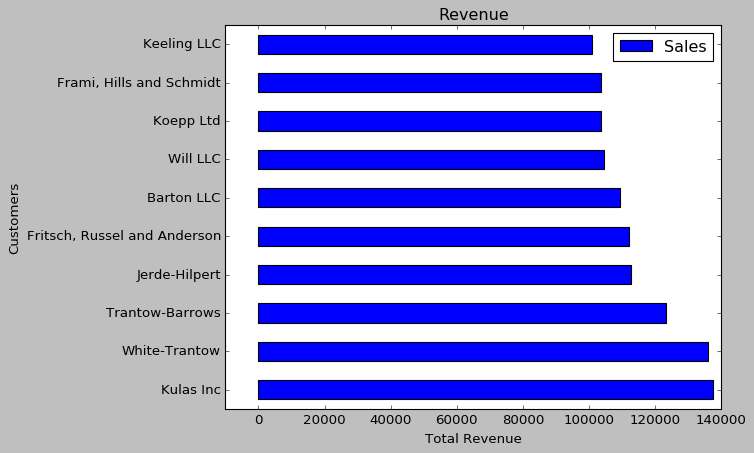

In [33]:
plt.style.use('classic')
#plt.gcf()
ax1 = plt.gca()

top_10.plot(kind='barh', y="Sales", x="Name", ax=ax1)
ax1.set_xlim([-10000, 140000])
ax1.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')


In [17]:
top_10.head(2)

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86


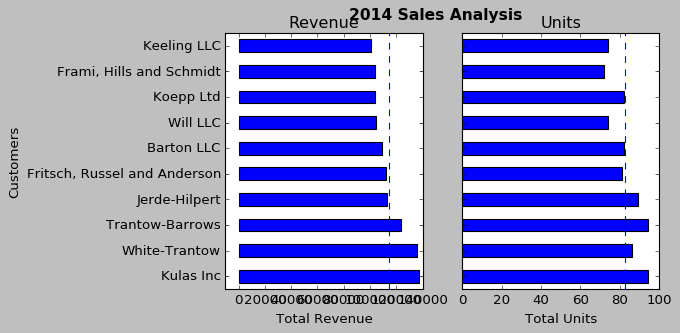

In [25]:
# Get the figure and the axes
fig, ax = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax[0])
ax[0].set_xlim([-10000, 140000])
ax[0].set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg1 = top_10['Sales'].mean()
ax[0].axvline(x=avg1, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax[1])
avg2 = top_10['Purchases'].mean()
ax[1].set(title='Units', xlabel='Total Units', ylabel='')
ax[1].axvline(x=avg2, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)